# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA AQUÍ TU RESPUESTA**

***Datos relevantes para valuación de propiedades:***

Ubicación, incluyendo: - ciudad, -barrio, -cercanía a puntos estratégicos (longitud y latitud en el data set)
Cantidad de ambientes, habitaciones y baños. La cantidad de estos tiene un impacto signficativo en el valor de las propiedades.
Superficie cubierta y total. Propieades con más m2 tienen un valor más elevado.
Ammenities u otras prestaciones que ofrezca la propiedad (climatización, terraza, balcón, pileta, etc)

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

**Cargamos el dataset**

In [127]:
data_properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

**Cantidad de filas y columnas - Identificación de columnas - Primeras instancias**

In [128]:
print(color.BLUE + 'Cantidad de filas y columnas' + color.END)
print(data_properati.shape)

Cantidad de filas y columnas
(146660, 19)


In [129]:
print(color.BLUE + 'Identificamos las columnas' + color.END)
print(data_properati.columns)

Identificamos las columnas
Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


In [130]:
print(color.GREEN + 'Primeras cinco instancias' + color.END)
data_properati.head()

Primeras cinco instancias


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [131]:
print(color.BLUE + "Imprimimos los datos de cada columna para poder identificar cuales se peuden descartar"+ color.END)
print(data_properati['operation_type'].unique()) 
print(data_properati['property_type'].unique())
print(data_properati['l1'].unique()) 
print(data_properati['l2'].unique())
print(data_properati['l3'].unique())
print(data_properati['currency'].unique()) 
print(data_properati['rooms'].unique())
print(data_properati['bedrooms'].unique())
print(data_properati['bathrooms'].unique())

Imprimimos los datos de cada columna para poder identificar cuales se peuden descartar
['Venta']
['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']
['Argentina']
['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Oeste']
['San Cristobal' 'Boedo' 'Palermo' 'La Plata' 'Villa Crespo'
 'Parque Patricios' 'Villa Pueyrredón' 'Pilar' 'Tigre' 'Abasto' 'Flores'
 'Morón' 'Nuñez' 'Almagro' 'Belgrano' 'Floresta' 'Recoleta' 'Balvanera'
 'Caballito' 'Chacarita' 'San Telmo' 'Colegiales' 'La Matanza'
 'San Isidro' 'San Miguel' 'Villa Luro' 'Barrio Norte' 'Las Cañitas'
 'San Nicolás' 'Villa Urquiza' 'Vicente López' 'Parque Centenario'
 'General San Martín' 'Villa General Mitre' 'Lanús' 'Ituzaingó' 'Boca'
 'Once' 'Retiro' 'Monserrat' 'Avellaneda' 'San Fernando' 'Puerto Madero'
 'Villa Ortuzar' 'Parque Chacabuco' 'Centro / Microcentro'
 'Tres de Febrero' 'Liniers' 'Coghlan' 'Congreso' 'Paternal' 'Saavedra'


In [132]:
print(color.BOLD + 'Columnas con dato único' + color.END)
print('operation_type' + ' - ' + 'Solo Ventas, se puede descartar')
print('l1' + ' - ' + 'Solo Argentina, se puede descartar')
print('currency' + ' - ' + 'Solo USD, se puede descartar')

Columnas con dato único
operation_type - Solo Ventas, se puede descartar
l1 - Solo Argentina, se puede descartar
currency - Solo USD, se puede descartar


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [133]:
print(color.GREEN + 'Valores faltantes por columna' + color.END)
print(pd.isna(data_properati).sum())

Valores faltantes por columna
start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

Tipos de propiedades en el DataSet
['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']
Cantidad de propiedades por cada 
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64
Countplot


<function matplotlib.pyplot.show(*args, **kw)>

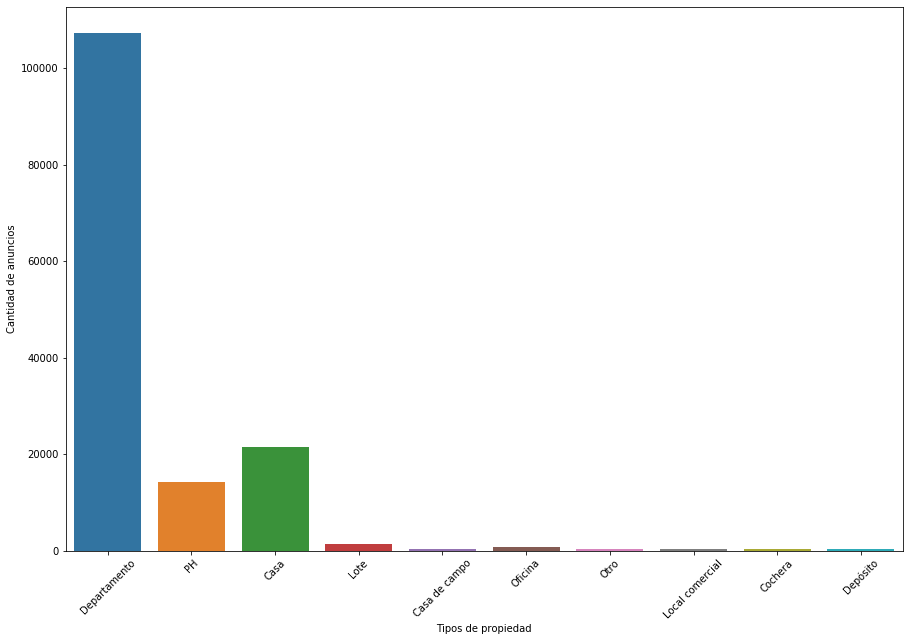

In [134]:
print(color.GREEN + 'Tipos de propiedades en el DataSet' + color.END)
print(data_properati['property_type'].unique())

print(color.RED + 'Cantidad de propiedades por cada ' + color.END)
print(data_properati['property_type'].value_counts())

print(color.BLUE + 'Countplot' + color.END)
plt.figure(figsize = (15,10))
sns.countplot(x = 'property_type', data = data_properati)
plt.xticks(rotation = 45)
plt.xlabel("Tipos de propiedad")
plt.ylabel("Cantidad de anuncios")
plt.show

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

Propiedades por localidad


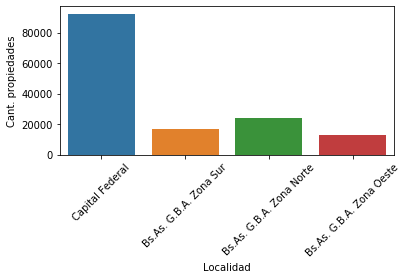

Cantidad de propiedades por barrio


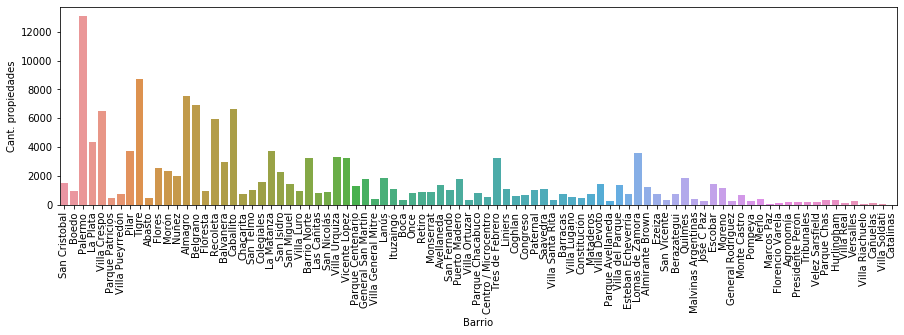

In [135]:
plt.figure(figsize = (6,6))
print('Propiedades por localidad')
plt.subplot(2,1,1)
sns.countplot(x = 'l2', data = data_properati)
plt.xticks(rotation = 45)
plt.xlabel('Localidad')
plt.ylabel('Cant. propiedades')
plt.show()

print('Cantidad de propiedades por barrio')
plt.figure(figsize = (15,8))
plt.subplot(2,1,2)
sns.countplot(x = 'l3', data = data_properati)
plt.xticks(rotation = 90)
plt.xlabel('Barrio')
plt.ylabel('Cant. propiedades')
plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

**Definimos el nuevo Data Frame, para Departamentos, PH y Casas en Capital Federal**

In [136]:
print(color.BLUE + 'Data Frame - Capital Federal - Departamento, PH y Casa' + color.END)
data_properati = data_properati[(data_properati.property_type=="Departamento")
                |(data_properati.property_type=="PH")
                |(data_properati.property_type=="Casa")
                ]
data_properati = data_properati[data_properati.l2 == "Capital Federal"]

print('Shape y head del nuevo Data Frame')
print(data_properati.shape)
data_properati.head()

Data Frame - Capital Federal - Departamento, PH y Casa
Shape y head del nuevo Data Frame
(91485, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

##### A continuación, obtenemos datos estadísticos de las variables solicitadas

In [137]:
data_properati = data_properati[['rooms' , 'bedrooms' , 
                               'bathrooms' , 'surface_total' , 
                               'surface_covered' , 'price' , 'property_type']]

data_properati.describe().round(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.00,91485.00,89314.00,82568.00,82250.00,91485.00
mean,2.96,1.96,1.56,112.63,94.97,259500.26
std,1.31,1.07,0.86,980.71,778.52,322265.44
min,1.00,0.00,1.00,10.00,1.00,6000.00
25%,2.00,1.00,1.00,49.00,44.00,120000.00
50%,3.00,2.00,1.00,71.00,63.00,175000.00
75%,4.00,3.00,2.00,111.00,96.00,279000.00
max,26.00,15.00,14.00,126062.00,126062.00,32434232.00


In [138]:
data_properati = data_properati.dropna()

In [139]:
data_properati.describe().round(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81210.00,81210.00,81210.00,81210.00,81210.00,81210.00
mean,3.01,2.00,1.55,112.91,95.12,266029.61
std,1.31,1.05,0.86,988.49,783.06,334042.24
min,1.00,0.00,1.00,10.00,1.00,6000.00
25%,2.00,1.00,1.00,49.00,44.00,125000.00
50%,3.00,2.00,1.00,71.00,63.00,180000.00
75%,4.00,3.00,2.00,111.00,96.00,280000.00
max,26.00,15.00,14.00,126062.00,126062.00,32434232.00


En la siguiente celda eliminamos aquellas instancias con error en la superficie

In [140]:
data_properati = data_properati.drop(data_properati[data_properati["surface_covered"]
                                                    >data_properati["surface_total"]].index)

In [141]:
data_properati.describe().round(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,80458.00,80458.00,80458.00,80458.00,80458.00,80458.00
mean,3.01,2.00,1.55,113.05,92.31,266364.54
std,1.30,1.04,0.85,993.00,773.34,334859.11
min,1.00,0.00,1.00,13.00,1.00,6000.00
25%,2.00,1.00,1.00,50.00,44.00,125000.00
50%,3.00,2.00,1.00,71.00,63.00,180000.00
75%,4.00,3.00,2.00,111.00,96.00,280000.00
max,26.00,15.00,14.00,126062.00,126062.00,32434232.00


Boxplots de superficie total y superficie cubierta


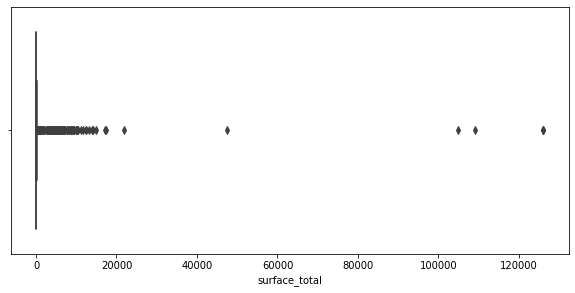

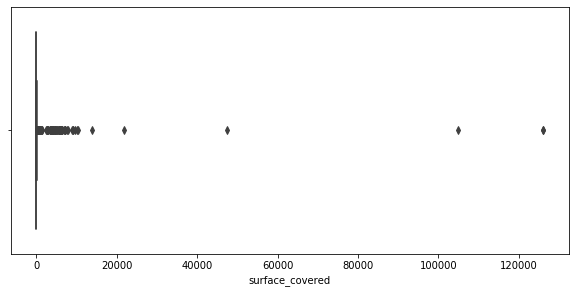

In [142]:
print(color.YELLOW + 'Boxplots de superficie total y superficie cubierta' + color.END)
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
sns.boxplot(x = 'surface_total', data = data_properati)
plt.figure(figsize = (10,10))
plt.subplot(2,1,2)
sns.boxplot(x = 'surface_covered', data = data_properati)

**A partir de evidenciar la existencia de outliers, se procede a eliminar los mismos a través del cálculo del IQR**

In [143]:
Q1 = data_properati['surface_total'].quantile(0.25)
Q3 = data_properati['surface_total'].quantile(0.75)
IQR = Q3 - Q1

In [144]:
data_properati = data_properati.drop(data_properati[data_properati['surface_total'] > Q3+1.5*IQR].index)

data_properati.describe().round(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,74295.00,74295.00,74295.00,74295.00,74295.00,74295.00
mean,2.82,1.87,1.44,78.26,69.30,214991.50
std,1.08,0.91,0.71,39.79,34.67,194811.25
min,1.00,0.00,1.00,13.00,1.00,6000.00
25%,2.00,1.00,1.00,48.00,43.00,120000.00
50%,3.00,2.00,1.00,68.00,60.00,170000.00
75%,4.00,2.00,2.00,99.00,85.00,255000.00
max,21.00,15.00,14.00,202.00,202.00,32434232.00


Boxplots de superficie total y superficie cubierta


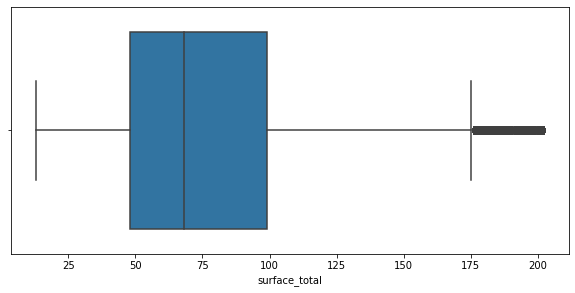

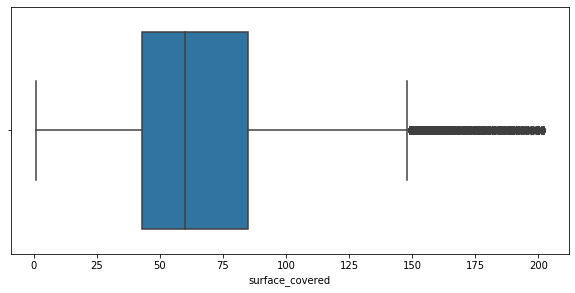

In [145]:
print(color.YELLOW + 'Boxplots de superficie total y superficie cubierta' + color.END)
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
sns.boxplot(x = 'surface_total', data = data_properati)
plt.figure(figsize = (10,10))
plt.subplot(2,1,2)
sns.boxplot(x = 'surface_covered', data = data_properati)

Boxplots de precio


<Figure size 720x720 with 0 Axes>

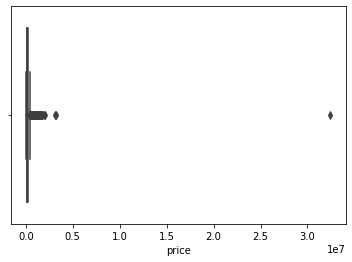

<Figure size 720x720 with 0 Axes>

In [146]:
print(color.GREEN + 'Boxplots de precio' + color.END)
sns.boxplot(x = 'price', data = data_properati)
plt.figure(figsize = (10,10))

**A partir del boxplot anterior, se visualiza la existencia de outliers en el precio, por lo que se va a realizar el mismo procedimiento que el utilizado con las superficies**

In [147]:
Q1 = data_properati['price'].quantile(0.25)
Q3 = data_properati['price'].quantile(0.75)
IQR = Q3 - Q1

In [148]:
data_properati = data_properati.drop(data_properati[data_properati['price'] > Q3+1.5*IQR].index)

data_properati.describe().round(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,69806.00,69806.00,69806.00,69806.00,69806.00,69806.0
mean,2.76,1.81,1.37,73.81,65.05,185090.8
std,1.05,0.89,0.63,35.86,30.21,87964.2
min,1.00,0.00,1.00,13.00,2.00,6000.0
25%,2.00,1.00,1.00,47.00,42.00,119000.0
50%,3.00,2.00,1.00,65.00,58.00,165000.0
75%,3.00,2.00,2.00,91.00,80.00,235000.0
max,21.00,15.00,14.00,202.00,202.00,456900.0


Nuevo Boxplot de precio


Text(0.5, 0, 'Precios')

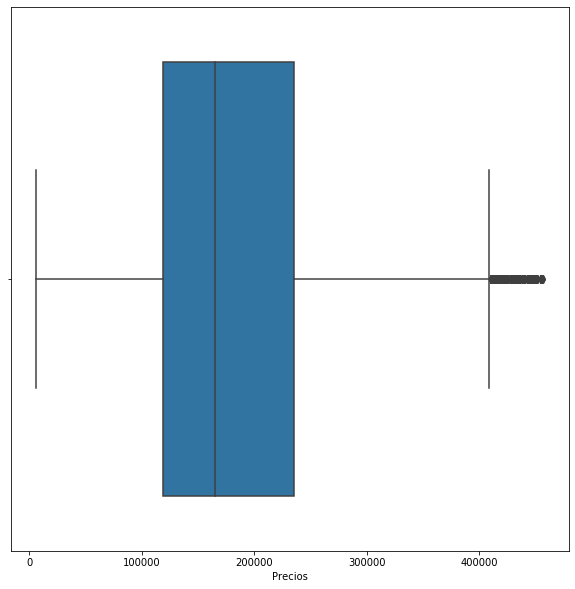

In [149]:
print(color.RED + 'Nuevo Boxplot de precio' + color.END)
plt.figure(figsize = (10,10))
sns.boxplot(x = 'price', data = data_properati)
plt.xlabel('Precios')

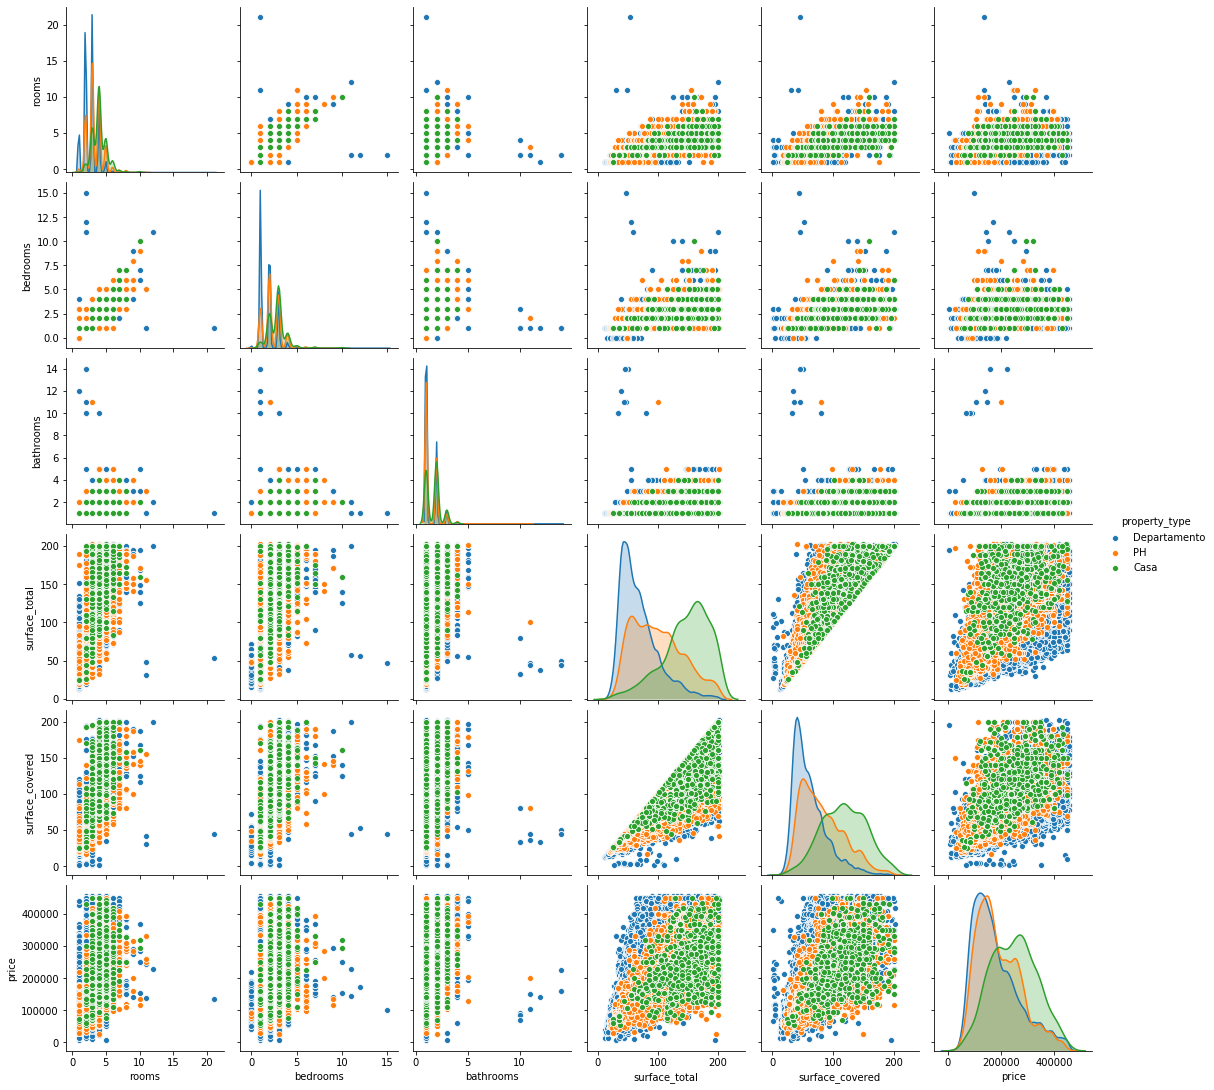

In [150]:
sns.pairplot(data = data_properati , hue = 'property_type')

Boxplots de habitaciones


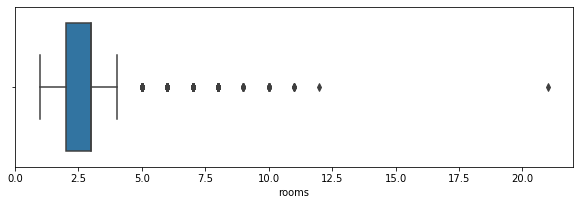

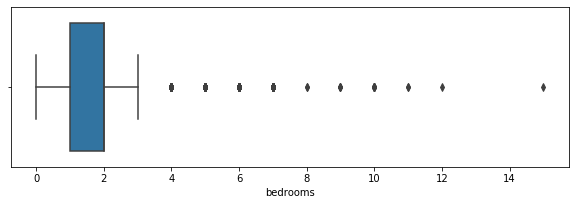

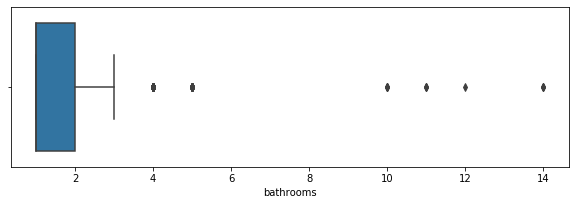

In [151]:
print(color.YELLOW + 'Boxplots de habitaciones' + color.END)
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
sns.boxplot(x = 'rooms', data = data_properati)
plt.figure(figsize = (10,10))
plt.subplot(3,1,2)
sns.boxplot(x = 'bedrooms', data = data_properati)
plt.figure(figsize = (10,10))
plt.subplot(3,1,3)
sns.boxplot(x = 'bathrooms', data = data_properati)

In [152]:
Q1 = data_properati['rooms'].quantile(0.25)
Q3 = data_properati['rooms'].quantile(0.75)
IQR = Q3 - Q1
print('El Rango Intercuartil de los Ambientes es:', IQR)

El Rango Intercuartil de los Ambientes es: 1.0


In [153]:
data_properati = data_properati.drop(data_properati[data_properati['rooms'] > Q3+1.5*IQR].index)

In [154]:
Q1 = data_properati['bedrooms'].quantile(0.25)
Q3 = data_properati['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
print('El Rango Intercuartil de las Habitaciones es:', IQR)

El Rango Intercuartil de las Habitaciones es: 1.0


In [155]:
data_properati = data_properati.drop(data_properati[data_properati['bedrooms'] > Q3+1.5*IQR].index)

In [156]:
Q1 = data_properati['bathrooms'].quantile(0.25)
Q3 = data_properati['bathrooms'].quantile(0.75)
IQR = Q3 - Q1
print('El Rango Intercuartil de los Baños es:', IQR)

El Rango Intercuartil de los Baños es: 1.0


In [157]:
data_properati = data_properati.drop(data_properati[data_properati['bathrooms'] > Q3+1.5*IQR].index)

In [158]:
data_properati.describe().round(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,66276.00,66276.00,66276.00,66276.00,66276.00,66276.00
mean,2.63,1.71,1.31,70.15,61.69,179405.70
std,0.89,0.75,0.54,32.20,26.29,84341.79
min,1.00,0.00,1.00,13.00,2.00,7500.00
25%,2.00,1.00,1.00,46.00,42.00,115000.00
50%,3.00,2.00,1.00,63.00,55.00,159500.00
75%,3.00,2.00,2.00,86.00,75.00,226865.00
max,4.00,3.00,3.00,202.00,202.00,456619.00


6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

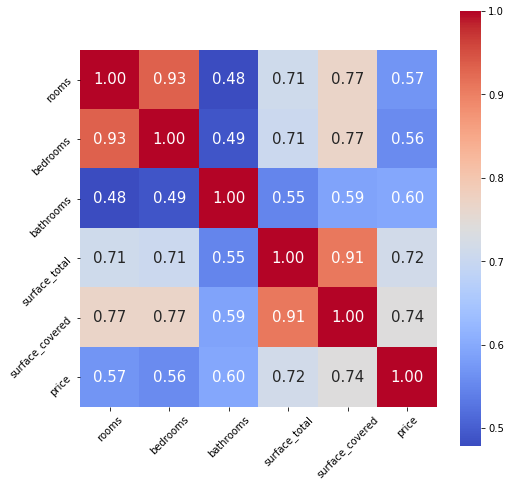

In [159]:
corr = data_properati.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Se puede inferir, a partir del heatmap, que las features que más influyen en el precio de los inmuebles son "SUPERFICIE TOTAL" y "SUPERFICIE CUBIERTA", y "BAÑOS" en menor medida.

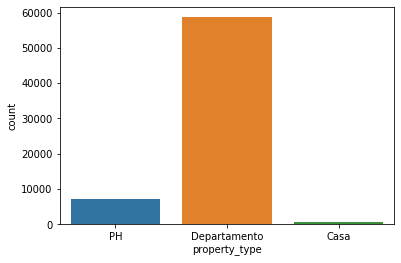

In [160]:
sns.countplot(data = data_properati, x = 'property_type')

### 2.1 Desafío

Una pregunta que se podría responder a partir del dataset propuesto es:
***"¿El m2 por propiedad, tiene un mayor costo en casas o departamentos?***
Los sesgos que se pueden presentar a la hora de responder esta pregunta van a estar relacionados con la ubicación de la propiedad y con el fin al que se quiera destinar. Por ejemplo, una casa en un barrio donde se construyan edificios, tendrá un valor de m2 relacionado a su valor como terreno más que como casa.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81021 instacias y 6 columnas.

**Importo data set original**

In [161]:
data_properati_ml = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

**Filtramos: Departamento, PH y Casa de Capital Federal**

In [162]:
data_properati_ml = data_properati_ml[(data_properati_ml.property_type=="Departamento")
                |(data_properati_ml.property_type=="PH")
                |(data_properati_ml.property_type=="Casa")
                ]
data_properati_ml = data_properati_ml[data_properati_ml.l2 == "Capital Federal"]
data_properati_ml.shape

(91485, 19)

**Superficie menor a 1000 m2 y mayor a 15 m2; precio menor a 4.000.000 dólares**

In [163]:
data_properati_ml = data_properati_ml.drop(data_properati_ml[data_properati_ml['surface_total'] > 1000].index)
data_properati_ml = data_properati_ml.drop(data_properati_ml[data_properati_ml['surface_total'] < 15].index)
data_properati_ml = data_properati_ml.drop(data_properati_ml[data_properati_ml['price'] > 4000000].index)

In [164]:
data_properati_ml.shape

(91289, 19)

**Selecciono los atributos solicitados**

In [165]:
data_properati_ml = data_properati_ml[['rooms' , 'bedrooms' , 
                               'bathrooms' , 'surface_total' , 
                               'surface_covered' , 'price' , 'property_type']]
data_properati_ml.shape

(91289, 7)

**Elimino instancias con valores faltantes**

In [166]:
data_properati_ml = data_properati_ml.dropna()

In [167]:
data_properati_ml.shape

(81019, 7)

#### Importo librerías necesarias para Machine Learning

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

###### Métrica seleccionada: utilizaré el RMSE como métrica de evaluación para evitar que errores positivos y negativos se compensen entre sí, y para obtener una métrica que tenga las mismas magnitud y unidades que las variables bajo estudio.

##### Benchmark: modelo de Arboles de decisión, con una profunidad de 5, y con "Superficie cubierta" y "Baños" como features

###### La selección de las features para el benchmark se basó al heatmeap realizo durante el Análisis Exploratorio de Datos

In [169]:
X_bm = data_properati_ml[['bathrooms' , 
                          'surface_covered']]
y_bm = data_properati_ml.price

In [170]:
X_bm_train, X_bm_test, y_bm_train, y_bm_test = train_test_split(X_bm, y_bm, 
                                                                test_size=0.30, random_state=42 , 
                                                                stratify = data_properati_ml.property_type)

Entreno el modelo

In [171]:
tree_bm = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_bm.fit(X_bm_train, y_bm_train)
y_train_pred = tree_bm.predict(X_bm_train)
y_test_pred = tree_bm.predict(X_bm_test)

Calculo el RMSE y grafico:

Raíz del error cuadrático medio en Train: 177768.60472481867
Raíz del error cuadrático medio en Test: 174047.53354063735


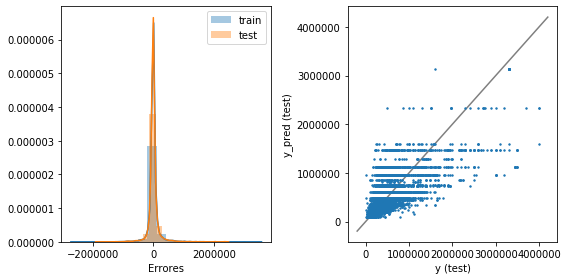

In [172]:
rmse_train = np.sqrt(mean_squared_error(y_bm_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_bm_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_bm_train - y_train_pred , bins = 20, label = 'train')
sns.distplot(y_bm_test - y_test_pred , bins = 20, label = 'test')
plt.xlabel('Errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_bm_test , y_test_pred , s =2)
    
lims = [
np.min([ax.get_xlim() , ax.get_ylim()]),  
np.max([ax.get_xlim() , ax.get_ylim()]),  
]
    
ax.plot(lims, lims, 'k-', alpha=0.5, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

#### A partir de los resultados obtenidos en el modelo benchmark, planteamos un modelo de KNN Vecinos mas cercanos, para poder comparar el desempeño.

A efectos de una mejor comparación, utilizaremos los mismos features que en el benchmark. Usaremos 5 vecinos para un primer análisis. 

In [173]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [174]:
X_knn = data_properati_ml[['bathrooms' , 
                          'surface_covered']]
y_knn = data_properati_ml.price

In [175]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, 
                                                                test_size=0.30, random_state=42 , 
                                                                stratify = data_properati_ml.property_type)

In [176]:
knn_model.fit(X_knn_train, y_knn_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [177]:
y_train_pred = knn_model.predict(X_knn_train)
y_test_pred = knn_model.predict(X_knn_test)

Calculo el RMSE y grafico:

Raíz del error cuadrático medio en Train: 157056.39909474397
Raíz del error cuadrático medio en Test: 166565.76941660585


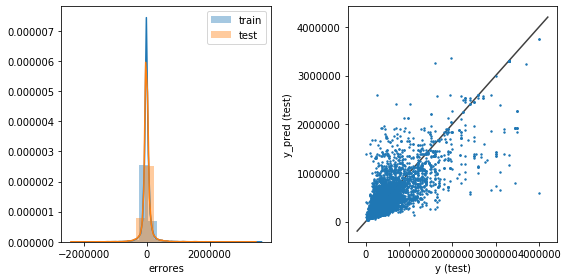

In [178]:
rmse_train = np.sqrt(mean_squared_error(y_knn_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_knn_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_knn_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_knn_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_knn_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  
np.max([ax.get_xlim(), ax.get_ylim()]),  
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

A primera vista, podemos observar una mejora en la métrica de desempeño, utilizando un modelo de vecinos mas cercanos en lugar de un modelo de arboles de decisión.


Para tener una mejor noción respecto de este modelo, a continuación graficaré como varía el RMSE para distintos valores de vecinos:

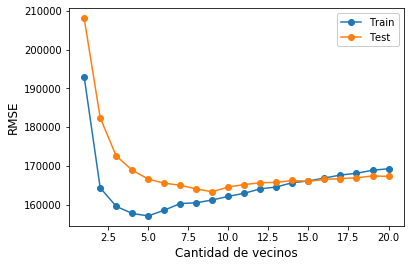

In [179]:
n=20
lista_RMSE=np.zeros(n*3).reshape(n,3)

for i in range(1,n+1):
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(X_knn_train,y_knn_train)
    y_train_pred = knn_model.predict(X_knn_train)
    rmse_train = np.sqrt(mean_squared_error(y_knn_train, y_train_pred))
    y_test_pred = knn_model.predict(X_knn_test)
    rmse_test = np.sqrt(mean_squared_error(y_knn_test, y_test_pred))
    lista_RMSE[i-1,:] = (i, rmse_train, rmse_test)
    
plt.plot(range(1, n+1), lista_RMSE[:,1], "-o", label = 'Train')
plt.plot(range(1, n+1), lista_RMSE[:,2], "-o", label = 'Test')
plt.legend(loc='upper right', framealpha = 1)
plt.xlabel('Cantidad de vecinos', size = "large")
plt.ylabel('RMSE', size = 'large')
plt.show()

### A partir de los resultados obtenidos en los dos modelos anteriormente planteados, procederé a entrenar nuevos modelos, en los que variaré los hiperparámetros y las features de los mismos.

##### Lo primero será un nuevo modelo de K vecinos, donde el número de vecinos será 8. Adicionalmente incorporaré como features: Ambientes, Habitaciones, Superficie total y Latitud y Longitud. Estas últimas dos son a los fines de incorporar en el modelo de predicción features que tomen en cuenta la ubicación del inmueble.

###### Vuelvo a importar el Data Frame, para evitar confusiones:

In [180]:
data_properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [181]:
properati_ml = data_properati[(data_properati.property_type == "Departamento")|
                            (data_properati.property_type == "PH")|
                            (data_properati.property_type == "Casa")]
properati_ml = properati_ml[properati_ml.l2 == "Capital Federal"]
properati_ml = properati_ml.drop(properati_ml[properati_ml['surface_total'] > 1000].index)
properati_ml = properati_ml.drop(properati_ml[properati_ml['surface_total'] < 15].index)
properati_ml = properati_ml.drop(properati_ml[properati_ml['price'] > 4000000].index)
properati_ml = properati_ml[['rooms',
                            'bedrooms',
                            'bathrooms',
                            'surface_total',
                            'surface_covered',
                            'price',
                            'property_type',
                            'lat',
                            'lon']]
properati_ml = properati_ml.dropna()
properati_ml.shape

(76771, 9)

In [182]:
knn_ml = KNeighborsRegressor(n_neighbors=8)

In [183]:
X = properati_ml[['rooms' , 'bedrooms' , 'bathrooms' , 
                  'surface_total' , 'surface_covered' , 
                 'lat' , 'lon']]
y = properati_ml.price

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,
                                                    test_size=0.30, random_state=42 , 
                                                    stratify = properati_ml.property_type)

In [185]:
knn_ml.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [186]:
y_train_pred = knn_ml.predict(X_train)
y_test_pred = knn_ml.predict(X_test)

RMSE y gráfico

Raíz del error cuadrático medio en Train: 129824.2509794574
Raíz del error cuadrático medio en Test: 148350.41619468026


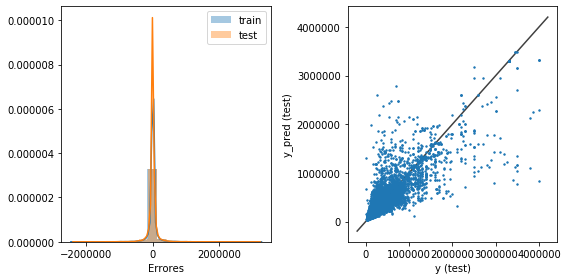

In [187]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('Errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  
np.max([ax.get_xlim(), ax.get_ylim()]),  
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Puede observarse que los resultados del modelo han mejorado a partir de la incorporación de nuevas features y un aumento en la cantidad de vecinos.